In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
from CMMToolbox import bioreactor # Importing the bioreactor module
from CMMToolbox import operation # Importing the operation module

import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Calling Strains
from CMMDatabase import whic_met_cmm,scer_met_cmm
### Calling the bioreactors initial parameters
from CMMDatabase import bionet_cmm1,bionet_cmm2,bionet_cmm3
### Calling Operation parameters
from CMMDatabase import batch_std,chemostat_dr10glc,chemostat_dr10xyl,chemostat_dr10cascade

#Construct the Biologicals dictionary for each reactor
biologicals_cmm1 = {
    'strains': ['WHIC'],
    'X': [0.1],
    'met': [whic_met_cmm],
}
biologicals_cmm2 = {
    'strains': ['SCER'],
    'X': [0.1],
    'met': [scer_met_cmm],
}
biologicals_cmm3 = {
    'strains':['WHIC','SCER'],
    'X':[0,0],
    'met':[whic_met_cmm,scer_met_cmm],
}

In [3]:
### Create the bioreactor and operation objects
# Bioreactor objects
bioreactor_cmm1 = bioreactor(biologicals_cmm1, bionet_cmm1, id='cmm1')
bioreactor_cmm2 = bioreactor(biologicals_cmm2, bionet_cmm2, id='cmm2')
bioreactor_cmm3 = bioreactor(biologicals_cmm3, bionet_cmm3, id='cmm3')
# Operation objects
batch= operation('batch',batch_std,dt=0.01,regulation=None)
chemostat_glc= operation('chemostat_glc',chemostat_dr10glc,dt=0.01,regulation=None)
chemostat_xyl= operation('chemostat_xyl',chemostat_dr10xyl,dt=0.01,regulation=None)
chemostat_cascade= operation('chemostat_cascade',chemostat_dr10cascade,dt=0.01,regulation=None)

In [4]:
bioreactor_cmm1.print_info()
bioreactor_cmm2.print_info()
bioreactor_cmm3.print_info()

Bioreactor ID: cmm1
Bioreactor state at time 0 hours.
biologicals Components: {'strains': ['WHIC'], 'X': array([0.1]), 'met': [{'N': ['Glucose', 'Acetate', 'Xylose', 'Arabinose'], 'S': ['GLC', 'ACE', 'XYL', 'ARA'], 'R': array([1., 1., 1., 1.]), 'type': 'inhibition', 'v': array([0.7, 0.3, 0.3, 0.5]), 'Ks': array([0.25, 0.01, 0.01, 0.01]), 'Yx': array([0.5, 0.3, 0.3, 0.4]), 'P': ['ACE', None, None, None], 'Yp': array([0.3, 0. , 0. , 0. ]), 'I': ['ACE', 'GLC', 'GLC', 'GLC'], 'Ki': array([9.22337204e+18, 2.50000000e-01, 2.50000000e-01, 2.50000000e-01])}]}
parameters Components: {'V': 1.0, 'pH': 7.0, 'T': 37.0, 'DOT': 0.005, 'GLC': 0.0, 'XYL': 5.0, 'ARA': 0.0, 'ACE': 0.0, 'ETH': 0.0, 'kla': 0.1}
Bioreactor ID: cmm2
Bioreactor state at time 0 hours.
biologicals Components: {'strains': ['SCER'], 'X': array([0.1]), 'met': [{'N': ['Glucose', 'Acetate', 'Ethanol'], 'S': ['GLC', 'ACE', 'ETH'], 'R': array([1., 1., 1.]), 'type': 'inhibition', 'v': array([0.5, 0.1, 0.2]), 'Ks': array([0.25, 0.01, 0.

In [5]:
##### YOU CAN DECIDE WHAT VARIABLES YOU WISH TO SAVE AND HOW TO SAVE THEM, I CHOSE HERE LIST FOR CONVENIENCE #####
# Initialize lists to collect data for plotting
# Constructing the structures to collect data for plotting
time=[]
bioreactor_1={
    'WHIC': [],
    'SCER': [],
    'GLC': [],
    'XYL': [],
    'ARA': [],
    'ACE': [],
    'ETH': [],
    'V': [],
}
bioreactor_2={
    'WHIC': [],
    'SCER': [],
    'GLC': [],
    'XYL': [],
    'ARA': [],
    'ACE': [],
    'ETH': [],
    'V': [],
}
bioreactor_3={
    'WHIC': [],
    'SCER': [],
    'GLC': [],
    'XYL': [],
    'ARA': [],
    'ACE': [],
    'ETH': [],
    'V': [],
}
# Function to collect data from the bioreactors
def collect_data(bioreactor_cmm1, bioreactor_cmm2, bioreactor_cmm3):
    global bioreactor_1, bioreactor_2, bioreactor_3
    bioreactor_1['WHIC'].append(bioreactor_cmm1.biologicals['X'][0])
    bioreactor_1['SCER'].append(0)
    bioreactor_1['GLC'].append(bioreactor_cmm1.parameters['GLC'])
    bioreactor_1['XYL'].append(bioreactor_cmm1.parameters['XYL'])
    bioreactor_1['ARA'].append(bioreactor_cmm1.parameters['ARA'])
    bioreactor_1['ACE'].append(bioreactor_cmm1.parameters['ACE'])
    bioreactor_1['ETH'].append(bioreactor_cmm1.parameters['ETH'])
    bioreactor_1['V'].append(bioreactor_cmm1.parameters['V'])
    bioreactor_2['WHIC'].append(0)
    bioreactor_2['SCER'].append(bioreactor_cmm2.biologicals['X'][0])
    bioreactor_2['GLC'].append(bioreactor_cmm2.parameters['GLC'])
    bioreactor_2['XYL'].append(bioreactor_cmm2.parameters['XYL'])
    bioreactor_2['ARA'].append(bioreactor_cmm2.parameters['ARA'])
    bioreactor_2['ACE'].append(bioreactor_cmm2.parameters['ACE'])
    bioreactor_2['ETH'].append(bioreactor_cmm2.parameters['ETH'])
    bioreactor_2['V'].append(bioreactor_cmm2.parameters['V'])
    bioreactor_3['WHIC'].append(bioreactor_cmm3.biologicals['X'][0])
    bioreactor_3['SCER'].append(bioreactor_cmm3.biologicals['X'][1])
    bioreactor_3['GLC'].append(bioreactor_cmm3.parameters['GLC'])
    bioreactor_3['XYL'].append(bioreactor_cmm3.parameters['XYL'])
    bioreactor_3['ARA'].append(bioreactor_cmm3.parameters['ARA'])
    bioreactor_3['ACE'].append(bioreactor_cmm3.parameters['ACE'])
    bioreactor_3['ETH'].append(bioreactor_cmm3.parameters['ETH'])
    bioreactor_3['V'].append(bioreactor_cmm3.parameters['V'])

In [6]:
### SIMULATION
# Collect initial data
time.append(0)
collect_data(bioreactor_cmm1, bioreactor_cmm2, bioreactor_cmm3)
# Simulation loop and data point collection
while time[-1] <= 50:  # Simulate for 1000 time units
    if time[-1] < 10:
        bioreactor_cmm1.operate_dt(batch)
        bioreactor_cmm2.operate_dt(batch)
        bioreactor_cmm3.operate_dt(batch,verbose=True)
    else:
        bioreactor_cmm1.operate_dt(chemostat_xyl)
        bioreactor_cmm2.operate_dt(chemostat_glc)
        # Cascade operation constant regulation by flow proportions
        p1=0.5 # Proportion of flow of bioreactor 1 to cascade
        p2=0.5 # Proportion of flow of bioreactor 2 to cascade
        glc= bioreactor_cmm1.parameters['GLC']*p1+ bioreactor_cmm2.parameters['GLC']*p2
        xyl= bioreactor_cmm1.parameters['XYL']*p1+ bioreactor_cmm2.parameters['XYL']*p2
        ara= bioreactor_cmm1.parameters['ARA']*p1+ bioreactor_cmm2.parameters['ARA']*p2
        ace= bioreactor_cmm1.parameters['ACE']*p1+ bioreactor_cmm2.parameters['ACE']*p2
        eth= bioreactor_cmm1.parameters['ETH']*p1+ bioreactor_cmm2.parameters['ETH']*p2
        chemostat_cascade.parameters['C_in']=np.array([glc,xyl,ara,ace,eth])
        bioreactor_cmm3.biologicals['X'][0]=bioreactor_cmm3.biologicals['X'][0]+(bioreactor_cmm1.biologicals['X'][0]*p1 + 0*p2)*chemostat_cascade.parameters['F_in']/bioreactor_cmm3.parameters['V']*chemostat_cascade.dt
        bioreactor_cmm3.biologicals['X'][1]=bioreactor_cmm3.biologicals['X'][1]+(0*p1 + bioreactor_cmm2.biologicals['X'][0]*p2)*chemostat_cascade.parameters['F_in']/bioreactor_cmm3.parameters['V']*chemostat_cascade.dt
        bioreactor_cmm3.operate_dt(chemostat_cascade,verbose=True)
    # Collect data at each time step
    time.append(time[-1] + 0.01)  # Increment time by dt
    collect_data(bioreactor_cmm1, bioreactor_cmm2, bioreactor_cmm3)


Bioreactor state updated to 0.01 hours.
Bioreactor state updated to 0.02 hours.
Bioreactor state updated to 0.03 hours.
Bioreactor state updated to 0.04 hours.
Bioreactor state updated to 0.05 hours.
Bioreactor state updated to 0.060000000000000005 hours.
Bioreactor state updated to 0.07 hours.
Bioreactor state updated to 0.08 hours.
Bioreactor state updated to 0.09 hours.
Bioreactor state updated to 0.09999999999999999 hours.
Bioreactor state updated to 0.10999999999999999 hours.
Bioreactor state updated to 0.11999999999999998 hours.
Bioreactor state updated to 0.12999999999999998 hours.
Bioreactor state updated to 0.13999999999999999 hours.
Bioreactor state updated to 0.15 hours.
Bioreactor state updated to 0.16 hours.
Bioreactor state updated to 0.17 hours.
Bioreactor state updated to 0.18000000000000002 hours.
Bioreactor state updated to 0.19000000000000003 hours.
Bioreactor state updated to 0.20000000000000004 hours.
Bioreactor state updated to 0.21000000000000005 hours.
Bioreacto

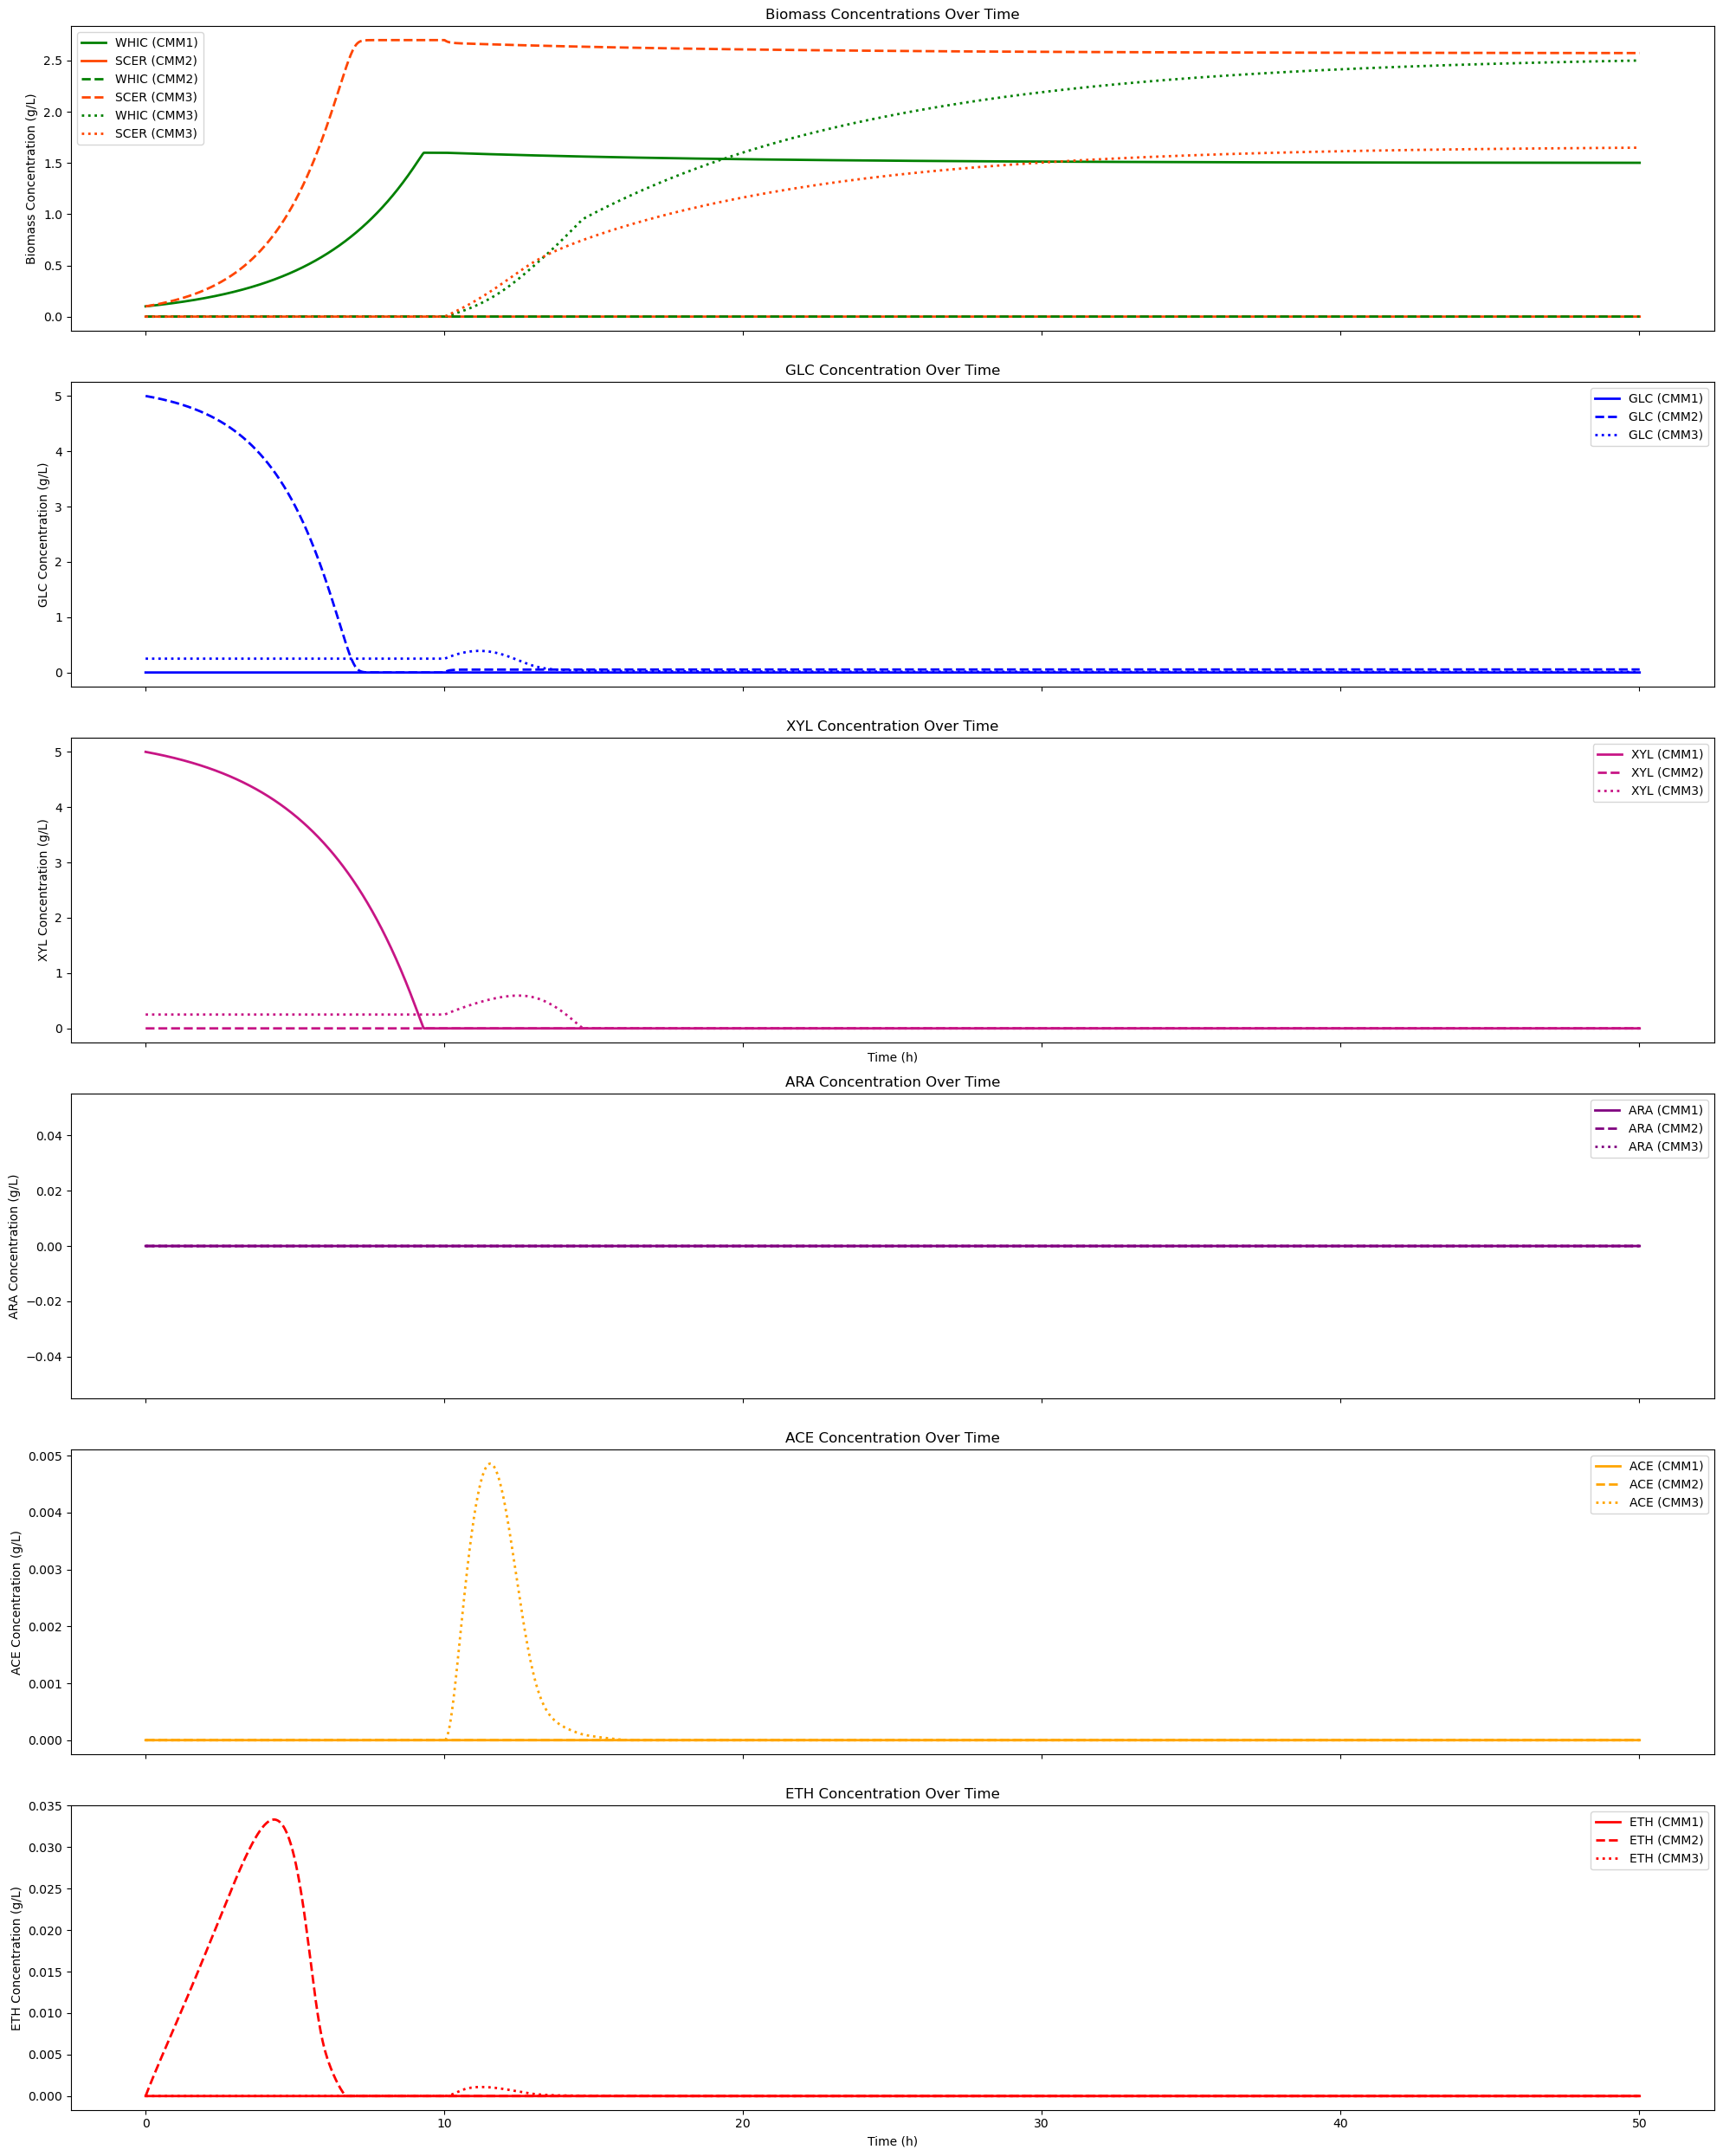

In [9]:
# Plotting the results
fig, axs = plt.subplots(6, figsize=(20, 25), sharex=True)
# Plotting biomass concentrations
axs[0].plot(time, bioreactor_1['WHIC'], label='WHIC (CMM1)', color='green', linewidth=2,linestyle='solid')
axs[0].plot(time, bioreactor_1['SCER'], label='SCER (CMM2)', color='orangered', linewidth=2,linestyle='solid')
axs[0].plot(time, bioreactor_2['WHIC'], label='WHIC (CMM2)', color='green', linewidth=2,linestyle='dashed')
axs[0].plot(time, bioreactor_2['SCER'], label='SCER (CMM3)', color='orangered', linewidth=2,linestyle='dashed')
axs[0].plot(time, bioreactor_3['WHIC'], label='WHIC (CMM3)', color='green', linewidth=2,linestyle='dotted')
axs[0].plot(time, bioreactor_3['SCER'], label='SCER (CMM3)', color='orangered', linewidth=2,linestyle='dotted')
axs[0].set_ylabel('Biomass Concentration (g/L)')
axs[0].set_title('Biomass Concentrations Over Time')
axs[0].legend()
# Plotting GLC concentrations
axs[1].plot(time, bioreactor_1['GLC'], label='GLC (CMM1)', color='blue', linewidth=2,linestyle='solid')
axs[1].plot(time, bioreactor_2['GLC'], label='GLC (CMM2)', color='blue', linewidth=2,linestyle='dashed')
axs[1].plot(time, bioreactor_3['GLC'], label='GLC (CMM3)', color='blue', linewidth=2,linestyle='dotted')
axs[1].set_ylabel('GLC Concentration (g/L)')
axs[1].set_title('GLC Concentration Over Time')
axs[1].legend()
# Plotting XYL concentrations
axs[2].plot(time, bioreactor_1['XYL'], label='XYL (CMM1)', color='mediumvioletred', linewidth=2,linestyle='solid')
axs[2].plot(time, bioreactor_2['XYL'], label='XYL (CMM2)', color='mediumvioletred', linewidth=2,linestyle='dashed')
axs[2].plot(time, bioreactor_3['XYL'], label='XYL (CMM3)', color='mediumvioletred', linewidth=2,linestyle='dotted')
axs[2].set_ylabel('XYL Concentration (g/L)')
axs[2].set_xlabel('Time (h)')
axs[2].set_title('XYL Concentration Over Time')
axs[2].legend()
# Plotting ARA concentrations
axs[3].plot(time, bioreactor_1['ARA'], label='ARA (CMM1)', color='purple', linewidth=2,linestyle='solid')
axs[3].plot(time, bioreactor_2['ARA'], label='ARA (CMM2)', color='purple', linewidth=2,linestyle='dashed')
axs[3].plot(time, bioreactor_3['ARA'], label='ARA (CMM3)', color='purple', linewidth=2,linestyle='dotted')
axs[3].set_ylabel('ARA Concentration (g/L)')
axs[3].set_title('ARA Concentration Over Time')
axs[3].legend()
# Plotting ACE concentrations
axs[4].plot(time, bioreactor_1['ACE'], label='ACE (CMM1)', color='orange', linewidth=2,linestyle='solid')
axs[4].plot(time, bioreactor_2['ACE'], label='ACE (CMM2)', color='orange', linewidth=2,linestyle='dashed')
axs[4].plot(time, bioreactor_3['ACE'], label='ACE (CMM3)', color='orange', linewidth=2,linestyle='dotted')
axs[4].set_ylabel('ACE Concentration (g/L)')
axs[4].set_title('ACE Concentration Over Time')
axs[4].legend()
# Plotting ETH concentrations
axs[5].plot(time, bioreactor_1['ETH'], label='ETH (CMM1)', color='red', linewidth=2,linestyle='solid')
axs[5].plot(time, bioreactor_2['ETH'], label='ETH (CMM2)', color='red', linewidth=2,linestyle='dashed')
axs[5].plot(time, bioreactor_3['ETH'], label='ETH (CMM3)', color='red', linewidth=2,linestyle='dotted')
axs[5].set_ylabel('ETH Concentration (g/L)')
axs[5].set_xlabel('Time (h)')
axs[5].set_title('ETH Concentration Over Time')
axs[5].legend()
plt.tight_layout()
plt.show()



In [8]:
chemostat_cascade.parameters

{'F_in': 0.1,
 'M_in': ['GLC', 'XYL', 'ARA', 'ACE', 'ETH'],
 'C_in': array([0.02729949, 0.        , 0.        , 0.        , 0.        ]),
 'F_out': 0.1,
 'M_pl': ['GLC', 'XYL'],
 'C_pl': array([2.5, 2.5]),
 'V_pl': 0.001,
 'PVA': 0.0}